## Decision Tree - Classification

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [17]:
df = pd.read_csv("penguins_size.csv")
df.head()
# penguenlere ait bir dataseti.
# yaşadıkları ada, gaga uzunlukları, gaga genişlikleri, cinsiyetleri var. 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [19]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [20]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [21]:
10/344

0.029069767441860465

In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [24]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [25]:
df["sex"].unique()
# cinsiyet sutununda bir tane unique değeri nokta olarak bırakılmış.

array(['MALE', 'FEMALE', '.'], dtype=object)

In [26]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [27]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [28]:
df[df["sex"]== "."]
# sadece 1 tane olduğu görülüyor.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [29]:
df[df.species =="Gentoo"].groupby("sex").describe().T
# cinsiyetleri centoo olanlara göre gruplandırıp describe bakıldı. . olarak kaydedilen cinsiyet ile kadın ve erkek cinsiyet
# özelliklerine baktık. gördük ki . cinsiyeti Male imiş.

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [30]:
df.loc[336, "sex"] = "MALE"
# male cinsiyetine çevrilmiş.

In [31]:
df.loc[336, "sex"]

'MALE'

## Visualization

In [32]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

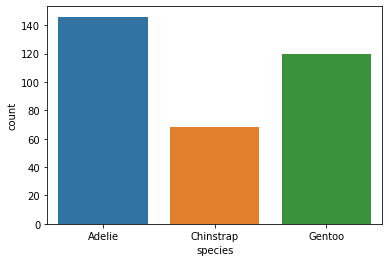

In [33]:
sns.countplot(x="species", data = df);

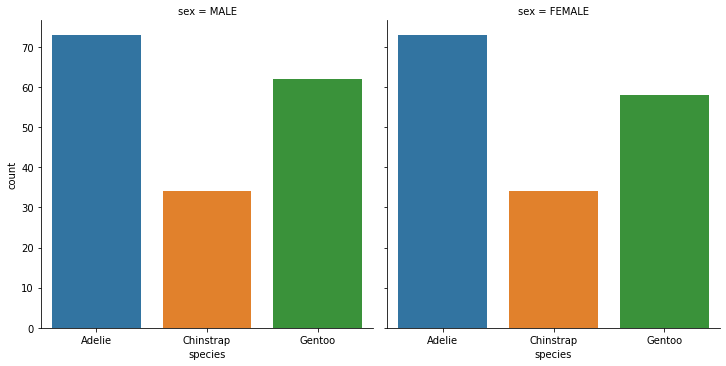

In [34]:
sns.catplot(x='species', data=df, kind='count',col='sex')

<Figure size 864x432 with 0 Axes>

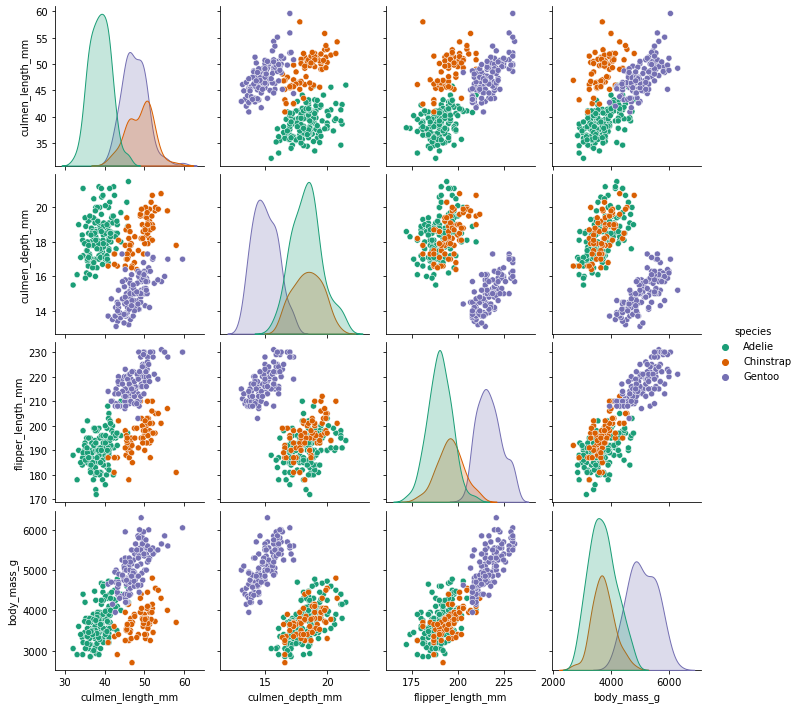

In [35]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [36]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### 3 boyutlu gösterim : 

In [37]:
!pip install plotly

In [38]:
import plotly.express as px

In [39]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [40]:
df.select_dtypes("number")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


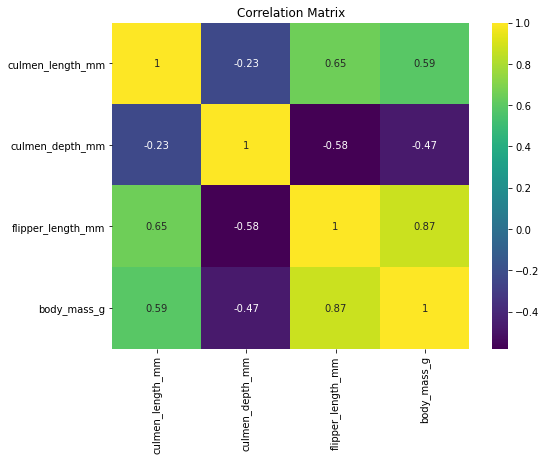

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Feature Engineering

In [42]:
df.drop("species", axis =1)
# türleri düşürüp.

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [43]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True)
# targeti üşürüp get_dummies uyguluyoruz.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Train | Test Split

In [44]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']
# target türler. türleri tahmin edeceğiz.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelling - Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
DT_model = DecisionTreeClassifier(random_state=101)

In [49]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [50]:
y_pred = DT_model.predict(X_test)

## Model Performance on Classification Tasks

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [52]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

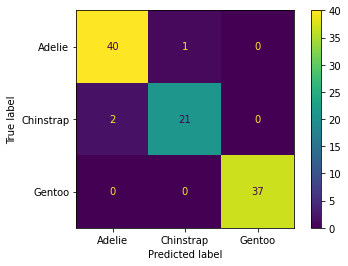

In [54]:
plot_confusion_matrix(DT_model,X_test,y_test);

In [56]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# adelia da 1 tane, Chinstrap 2 tane, Gentoo 0 tane hata yapmış

[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



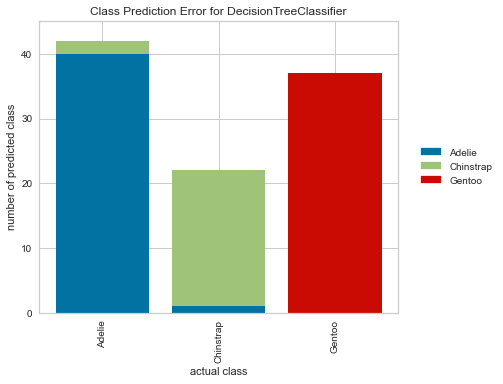

In [55]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();
# yukarıda ki skorları yellowbrick ile de alabiliriz.

In [57]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)
# burda skorlar çok yüksek ama train ve test skorları birbirlerine çok yakın overfiting yoktur.

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## Cross Validate ile kontrol edelim.

In [59]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [60]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
# multiclasslarda yani 2 den fazla değişkeni olan targetlarda micro, macro veya weighted bakabiliyorduk.
# micro dengeli datalarda yani train ve test arasında fark az ise
# macro datada dengesizlik varsa yani train ve test arasında fark fazla ise
# weighted : inbalance ama (sayısı fazla olan istersek) kullanılır.

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.005997,0.009995,0.958333,0.958333,0.958333,0.958333
2,0.006994,0.008992,0.958333,0.958333,0.958333,0.958333
3,0.005000,0.007992,0.916667,0.916667,0.916667,0.916667
4,0.004995,0.006997,0.956522,0.956522,0.956522,0.956522
5,0.011991,0.010992,1.000000,1.000000,1.000000,1.000000
6,0.004998,0.005996,1.000000,1.000000,1.000000,1.000000
7,0.003998,0.006994,1.000000,1.000000,1.000000,1.000000
8,0.003997,0.006997,1.000000,1.000000,1.000000,1.000000
9,0.003998,0.005997,0.869565,0.869565,0.869565,0.869565
10,0.003998,0.005995,1.000000,1.000000,1.000000,1.000000


In [61]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

## Feature Importances

In [64]:
DT_model.feature_importances_
# bu değerler her futureye karşılık gelen önem düzeyidir. hangi future daha önemli onu göstermektedir. 

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [65]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i
# yukarıdaki aldığımız önem skorlarını dataframeye dönüştürdük. küçüktenbüyüğe sırala dedik. görüldü ki bazı futurelere ciddi
# önem verildi. ama bazı futureler çok önemsiz oldu. sadece datanını çok kompleks olması değil bazı futurelerinde çok kuvvetli
# olması bizi overfitinge götürebilir.

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.052893
island_Dream,0.078360
culmen_length_mm,0.325918
flipper_length_mm,0.542829


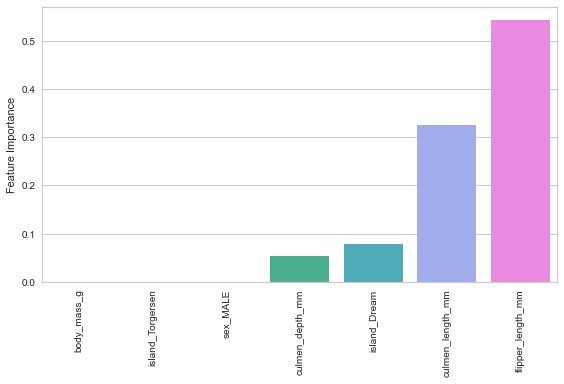

In [66]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
# futurelerin önem skorlarının grafiksel olarak gösterdik.

## Drop most important feature

In [67]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# yeni dataframe oluşturduk ve en önemli futuremizi düşürdük.
# The feature that weighs too much on the estimate can sometimes cause overfitting. For this reason, the most important feature can be dropped and the scores can be checked again

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [69]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [70]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [72]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)
# hata sayısı 3 ten 2 ye düştü.

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [74]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,0.006995,0.009993,1.000000,1.000000,1.000000,1.000000
2,0.006996,0.006997,1.000000,1.000000,1.000000,1.000000
3,0.003999,0.006994,0.958333,0.958333,0.958333,0.958333
4,0.004998,0.005994,1.000000,1.000000,1.000000,1.000000
5,0.003999,0.016989,1.000000,1.000000,1.000000,1.000000
6,0.005996,0.005996,1.000000,1.000000,1.000000,1.000000
7,0.003996,0.005996,1.000000,1.000000,1.000000,1.000000
8,0.003998,0.005996,1.000000,1.000000,1.000000,1.000000
9,0.003998,0.005995,1.000000,1.000000,1.000000,1.000000
10,0.004001,0.006995,0.956522,0.956522,0.956522,0.956522


In [75]:
df_scores.mean()[2:]
# skorlar çok iyileşti.

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

In [77]:
from sklearn.metrics import make_scorer
# her bir targetımın gözlemim için recall, precision ve f1 skorlarımı alabilirim

In [78]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

In [80]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# targeten değerlerinin tüm skorlarının cross validate ortalamaları.

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

In [82]:
from sklearn.tree import plot_tree
# ağaç çalışmasının grafiksel gösterimini çizdirir.

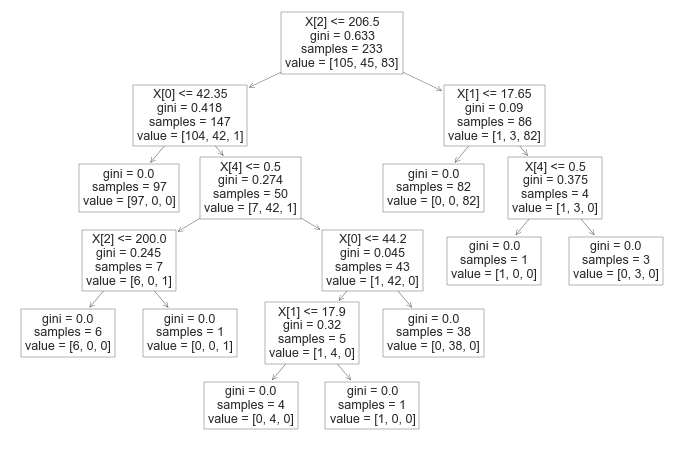

In [83]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);

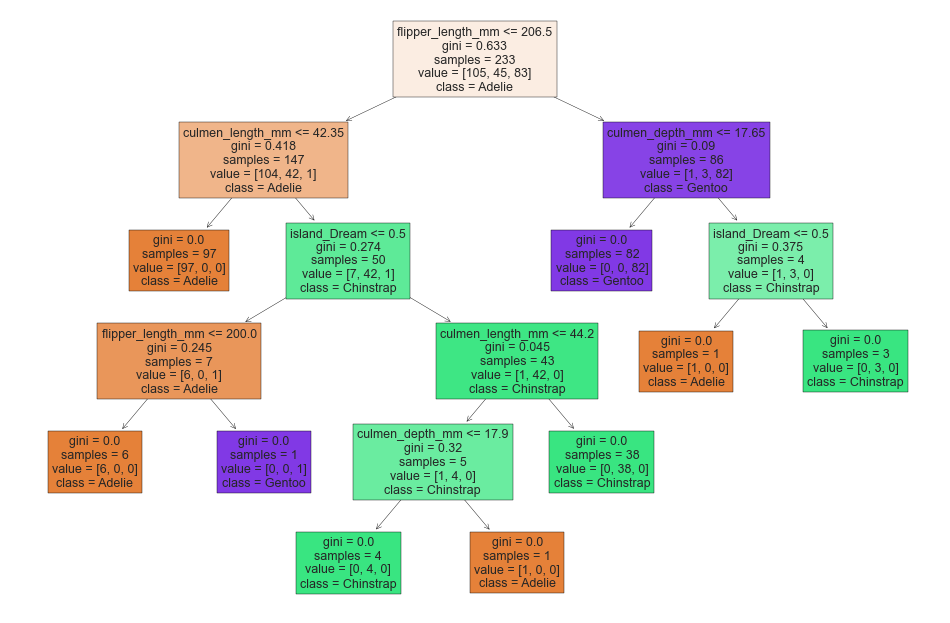

In [84]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());
# bu daha anlaşılır. hangi classa ait olduğunu bana göstermesi için unique değerlerini atamasını istedik.

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf 

In [85]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [86]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)
# max_depth değerine göre bakacağız. max_depth = 2 demek ağacım 2 katman dallansın demek.
# max_depth değeri = None ile ağacımızın kökünden başlayıp tüm değerleri kapsayarak bir ağaç çizeriz. buda bazen overfit
# durumu oluşturabilir. o yüzden max_depth değerini iyi ayarlamak gerekir.
# max_depth değeri azaldıkça trainde hata artar. yani test ve train seti skorları birbirlerine yakınlaştırır.

# min_samples_split : leafın yani yaprağın kaça bölüneceğini belirleriz. burda yapraklar 5 e bölünmüş. minimun gözlem sayısıdır.
# yaprak olarak kabul edilebilmesi için minimun kaç gözlem bulunması gerektiği şartını sağlar.

DecisionTreeClassifier(max_depth=2, random_state=101)



Test Set
[[36  5  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



Train Set
[[97  8  0]
 [ 0 45  0]
 [ 0  1 82]]


              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96       105
   Chinstrap       0.83      1.00      0.91        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.96       233
   macro avg       0.94      0.97      0.95       233
weighted avg       0.97      0.96      0.96       233



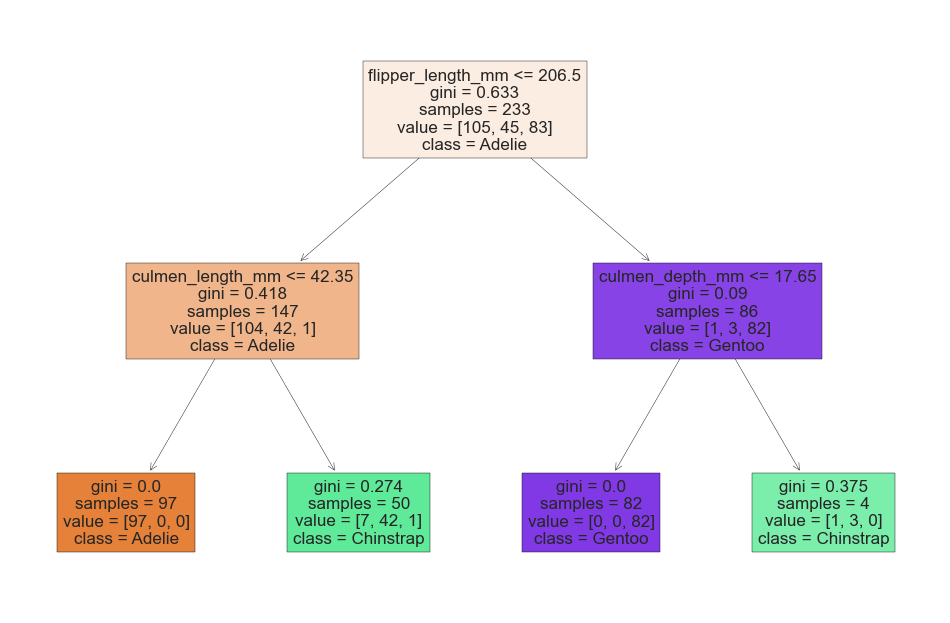

In [88]:
report_model(pruned_tree,)
# bunu diyerek ağacın kökü , ağacın iki dalı, sonra o dalların dallarına kadar ağacımızı seç ve bitir demek.

### Max Leaf Nodes

In [89]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=101,)
pruned_tree_2.fit(X_train,y_train)
# en sonda kalan yaprak sayım

DecisionTreeClassifier(max_leaf_nodes=5, random_state=101)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[103   2   0]
 [  0  45   0]
 [  1   0  82]]


              precision    recall  f1-score   support

      Adelie       0.99      0.98      0.99       105
   Chinstrap       0.96      1.00      0.98        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.98      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



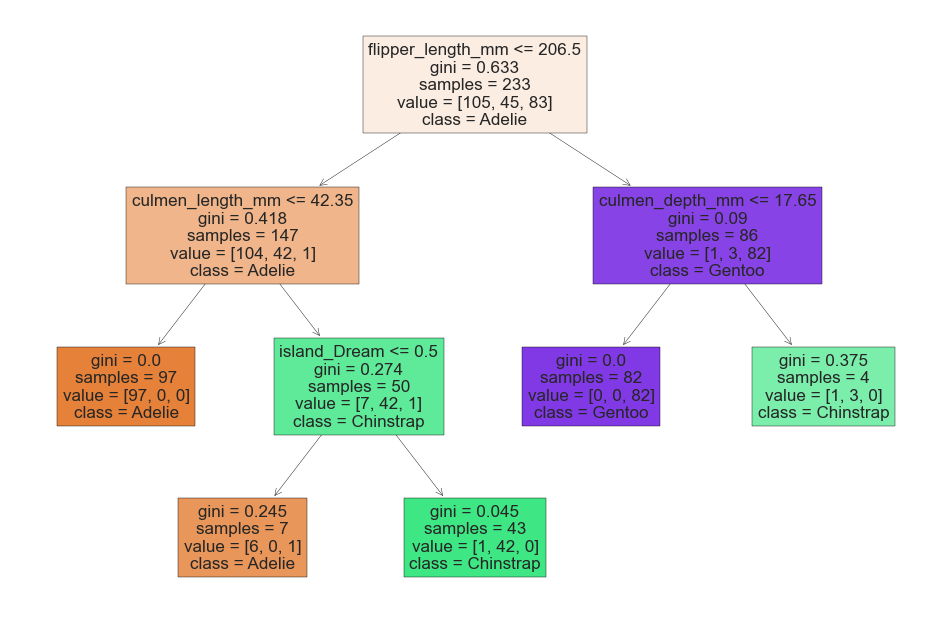

In [90]:
report_model(pruned_tree_2)

## Criterion

In [66]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



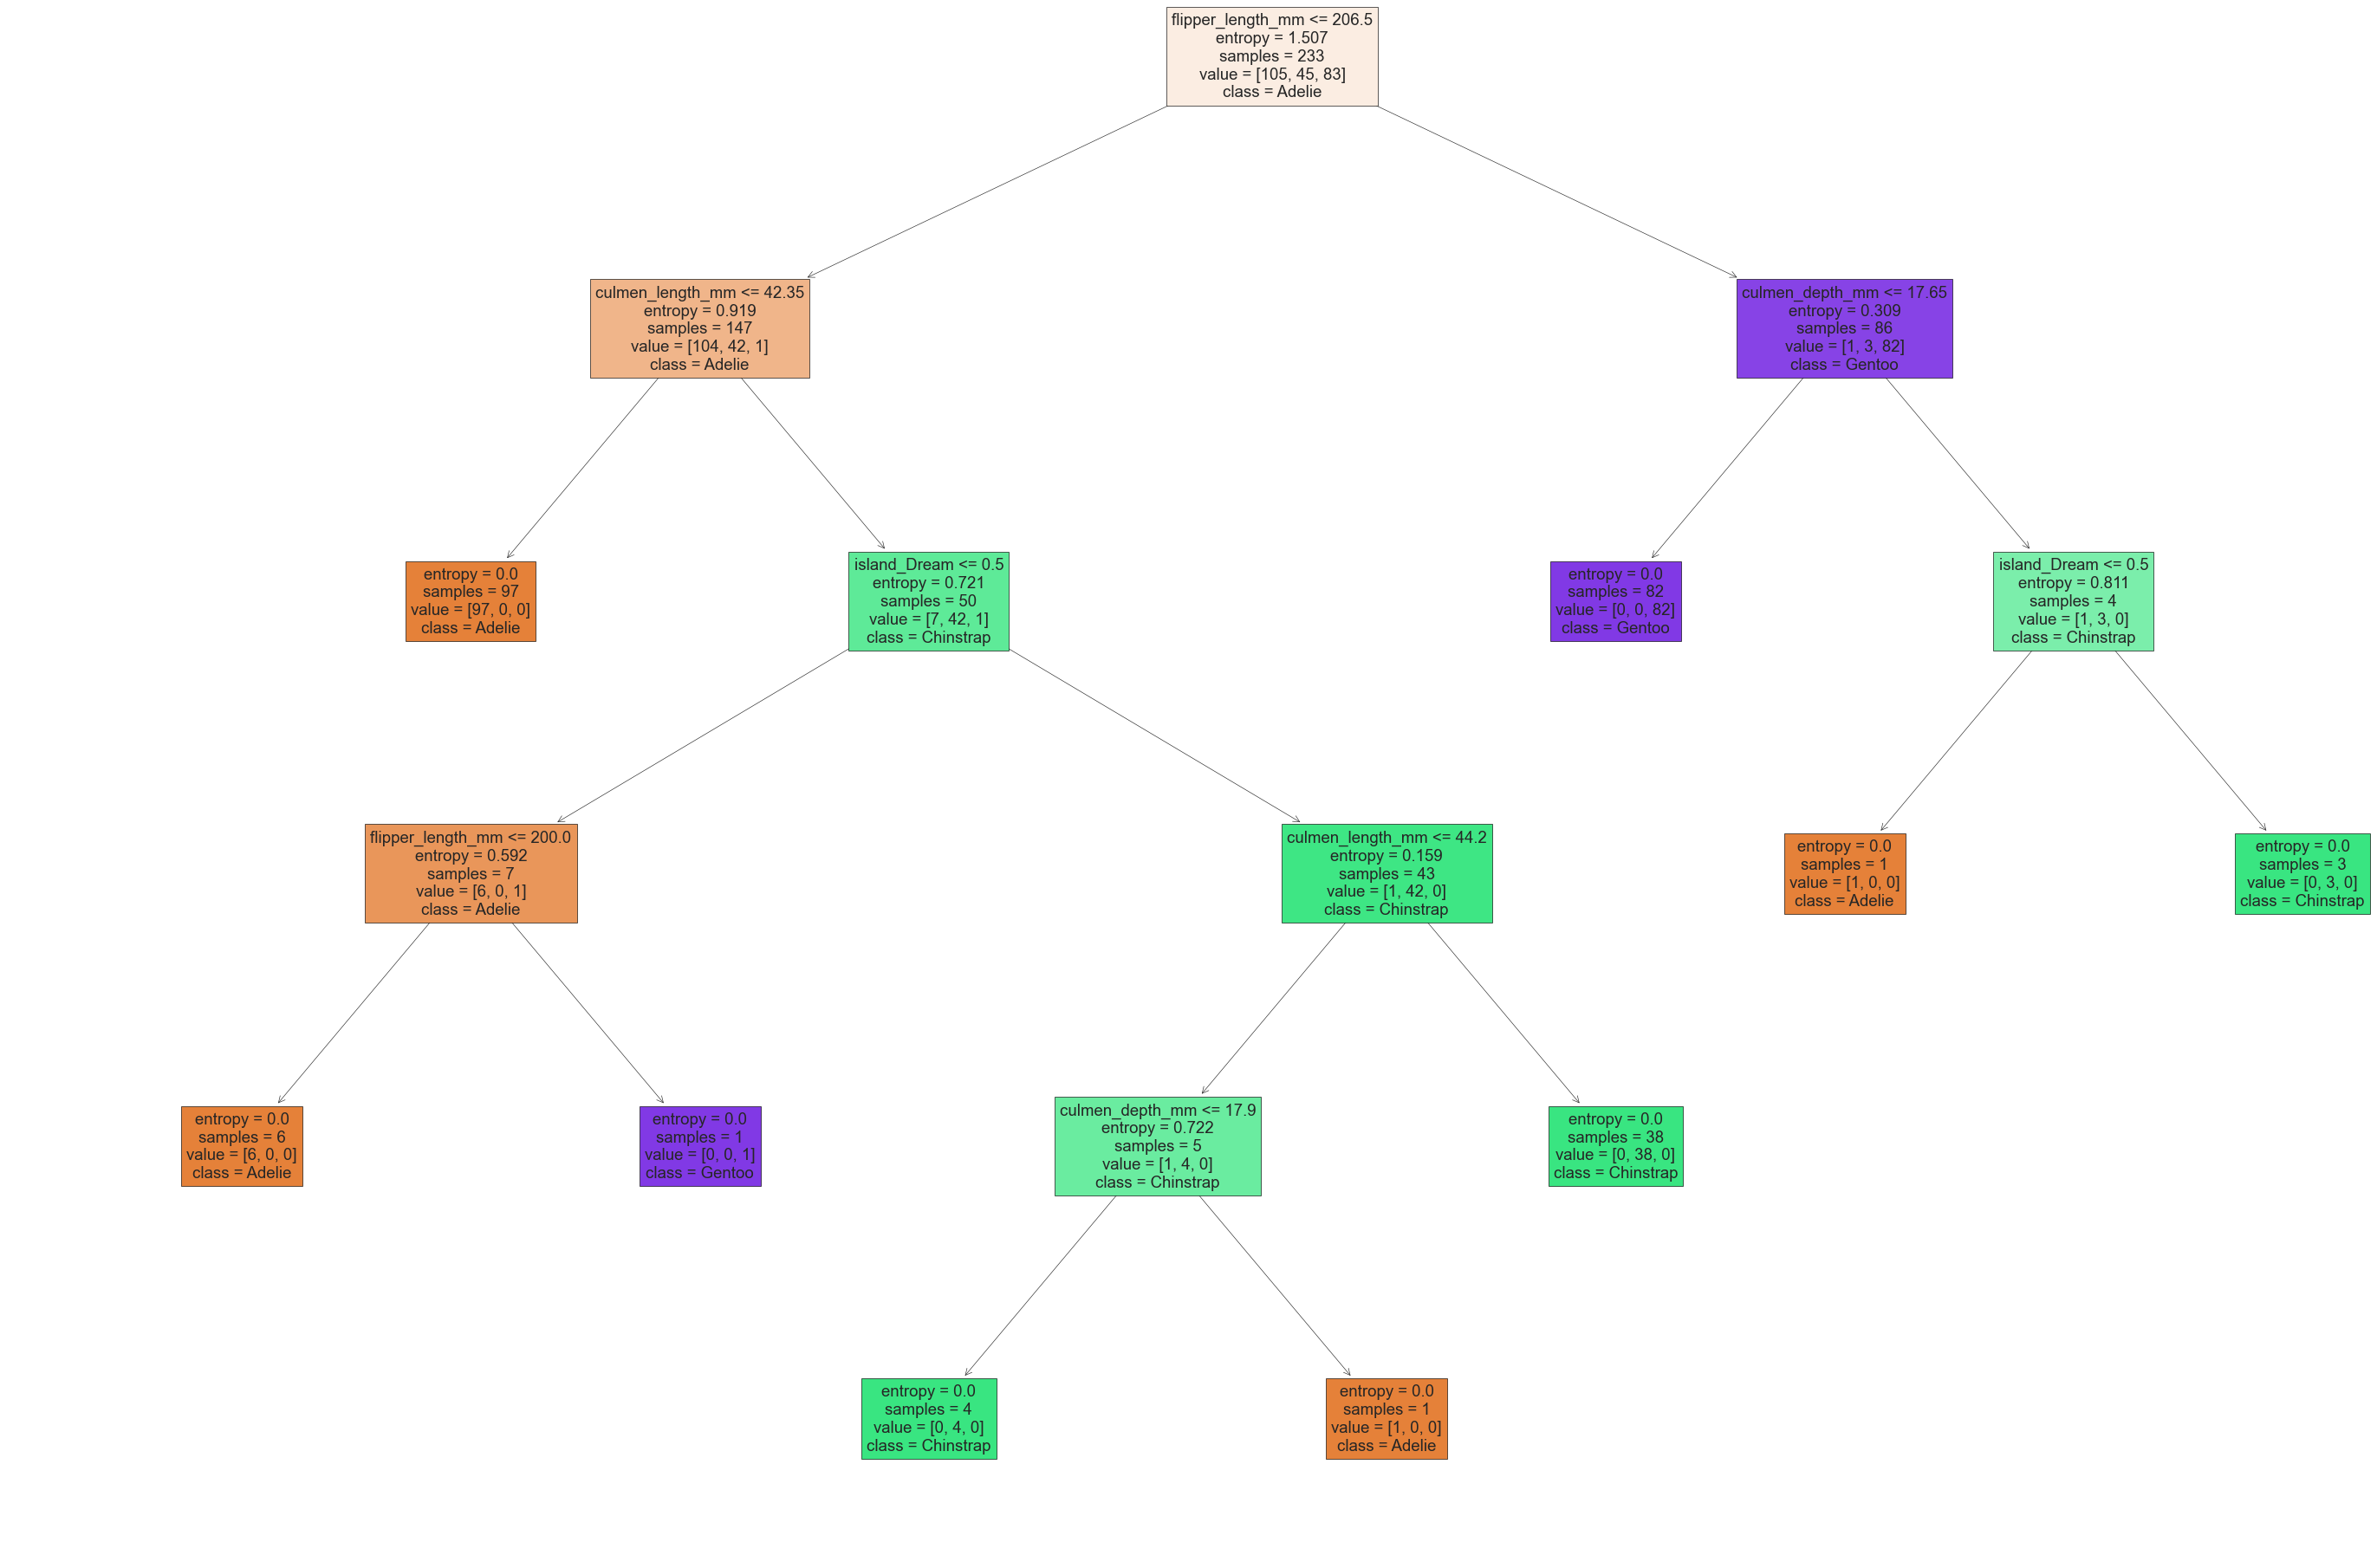

In [67]:
report_model(entropy_tree)

## Max_features, Splitter

In [104]:
tree = DecisionTreeClassifier(splitter = "best", max_features=None)
tree.fit(X_train,y_train)
# splitter hangi futureye soru sorup ağaç modeli çizmesini sağlar. best", "random" olarak 2 ye ayrılır. default best.
# best ile önem sırasına göre önemli dataya sorular ile başlar ama random rastgele sorular ile rastgele futurelere soru sorar.
# random da soru sayısı artar ama overfitnge engeldir. genelde best tercih edilir. 
# max_features= sayısı arttıkça test ve train arasında ki skor farkları azalır. 

DecisionTreeClassifier()



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



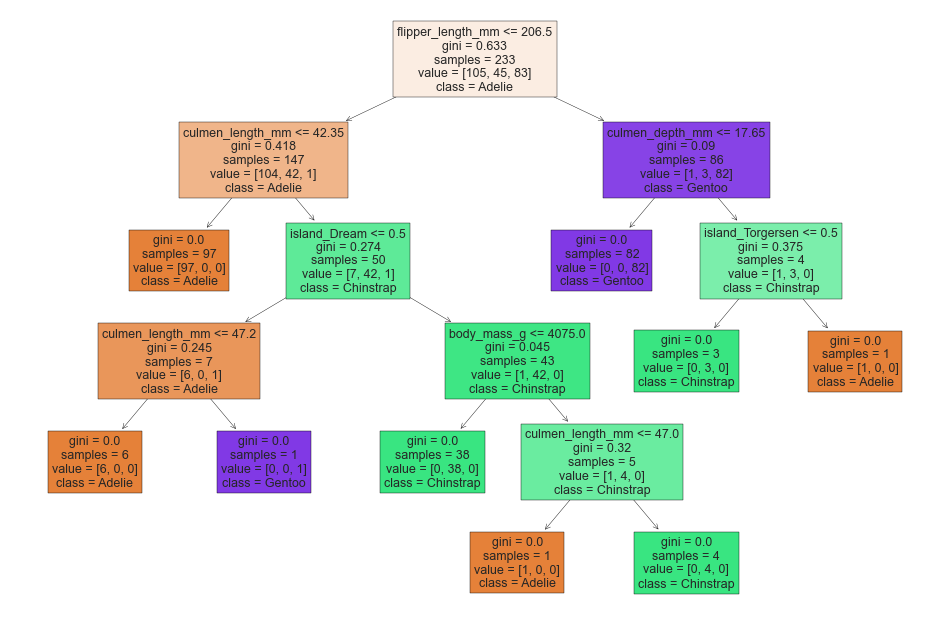

In [105]:
report_model(tree)

## Find Best Parameters

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
model = DecisionTreeClassifier(random_state=101)

In [108]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [109]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [110]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [111]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [112]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

